# BRISK
- Refer [paper](https://gurus.pyimagesearch.com/wp-content/uploads/2015/06/leutenegger_2011.pdf)
- Extension of FAST
- Aims to address a limitation of FAST: scale space invariance.
- The BRISK keypoint detector is used to detect corners in images. It is simply a multi-scale version of the FAST keypoint detector.

## How it works
- Original implementation of FAST examined the image at a single scale, meaning that it is unlikely keypoints could be repeated over multiple scales of the image.
- BRISK is able to address this limitation by creating scale space images, similar to DoG. 
- The general process is to halve the size of the image for each layer of the pyramid.
- For each layer of the pyramid, the standard FAST keypoint detector runs, with the max response, i.e, regions most likely to be a corner are taken across all levels of the image pyramid.
- As a reminder, FAST looks at the pixel intensity values surrounding the center pixel p. If n contiguous pixels are all either larger than or smaller than the center pixel, then the region is marked as a keypoint.
- Under the hood, BRISK utilizes FAST keypoint detector using a circular neighborhood of 16 pixels and uses a high-speed test with n=9 in an attempt to meet the contiguous requirement. If atleast 9 consecutive in the 16-pixel neighborhood pixel circle satisfy the threshold requirement, then the center pixel is marked as a keypoint. This process is then repeated for each layer of the pyramid.

In [1]:
import sys
sys.path.append("../../")

In [2]:
import cv2
import numpy as np
import imutils
from cv_imshow import display_image, create_subplot

In [3]:
args = {
    "image":"../../images/fast_book_cover.png",
    "pen":"../../images/keypoint_detect/pen.jpg"
}

In [6]:
def keypoint_detector(imagePath):
    image = cv2.imread(imagePath)
    orig = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #detect BRISK keypoints in the image
    detector = cv2.BRISK_create()
    kps = detector.detect(gray, None)
    
    print("# of keypoints: {}".format(len(kps)))
    
    #loop over the keypoints and draw them
    for kp in kps:
        r = int(0.5*kp.size)
        (x,y) = np.int0(kp.pt)
        cv2.circle(image, (x,y), r, (0,255,255), 2)
    
    display_image("Images", np.hstack([orig, image]))

# of keypoints: 938


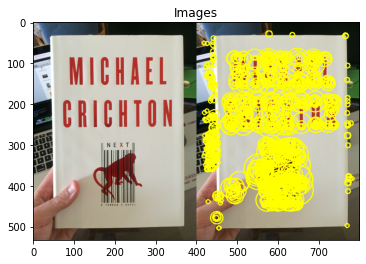

In [7]:
keypoint_detector(args["image"])

# of keypoints: 203


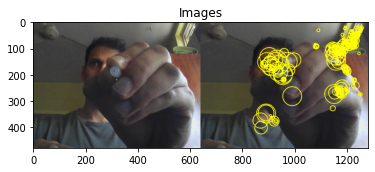

In [8]:
keypoint_detector(args["pen"])